In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Reading data from link
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
stud_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#Number of rows and columns
stud_data.shape

(25, 2)

In [7]:
#summary of the given data
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#names of columns in the data
stud_data.columns

Index(['Hours', 'Scores'], dtype='object')

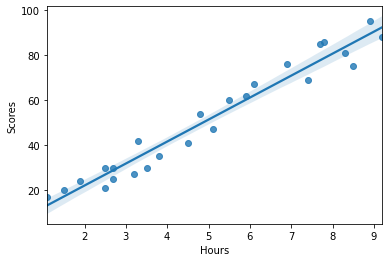

In [13]:
#Plot between Hours and Scores
scat_plot=sns.regplot(x='Hours',y='Scores',data=stud_data)

In [19]:
#we can see a linear relation between hours spent and scores obtained.

In [20]:
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values  

In [22]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm=LinearRegression()

In [27]:
#fit a model
model=lm.fit(X_train,y_train)

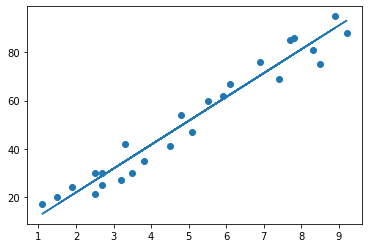

In [28]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [33]:
print(X_test)
#Predictions
y_pred=lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
# test with random data
hours=np.array(9.25).reshape(-1,1)
prediction=lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [49]:
#Evaluation
import sklearn.metrics as metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_test,y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

In [50]:
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9483
mean_squared_log_error:  0.0185
r2:  0.9455
MAE:  4.1839
MSE:  21.5988
RMSE:  4.6474
